# Simple Plot

### Plotting of Measurement Data:
* DriveTrain Encoder PID Controller
* Drivetrain Ultrasonic PID Controller
* Real Ultrasonic

### Import modules

In [2]:
from datetime import datetime, timedelta
import pandas as pd
#%matplotlib inline
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Specify file to read in

In [3]:
# Configure your input file here:
fileName    = "./data/plots/VCMeasure257.csv"

#####  Create a dataframe from measurement data in csv file
##### Set Time column as the index 
##### Collect the hour chunks in the data.
##### This is done to ignore the data in the log where there were no measurements.

In [4]:
# Read CSV file into a pandas dataframe 
OrigDataFrame   = pd.read_csv(fileName);
df = OrigDataFrame.copy()
# Change timestamp to python datatime
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df.set_index('Time',inplace=True)
# Print the first three and last three rows of measurements
#df.take([0,1,2,-3,-2,-1])
# Create a list of relevant measurement periods in the data
dfDay= [group[1] for group in df.groupby(df.index.day)]
dfHourList = []
#print("Total days of measuements:", len(dfDay))
for i in range(len(dfDay)):
    dfHour = [group[1] for group in dfDay[i].groupby(dfDay[i].index.hour)]
    for j in range(len(dfHour)):
        #print("Day: ", i, "Hour: ", j)
        dfHourList.append(dfHour[j])
# Show the range of the time stamps
for i in range(len(dfHourList)):
    print("Month ",dfHourList[i].index[0].month,"Day ",dfHourList[i].index[0].day,"Hour ",dfHourList[i].index[0].hour)
print("Total hours", len(dfHourList))

Month  1 Day  1 Hour  13
Month  1 Day  1 Hour  14
Month  1 Day  1 Hour  15
Month  1 Day  1 Hour  16
Month  1 Day  1 Hour  17
Month  1 Day  1 Hour  18
Month  1 Day  1 Hour  19
Month  1 Day  3 Hour  11
Month  1 Day  3 Hour  12
Month  1 Day  3 Hour  13
Total hours 10


#### Plot the "Speed Percent Error and Target" columns during the observational period

Month  1 Day  1 Hour 13


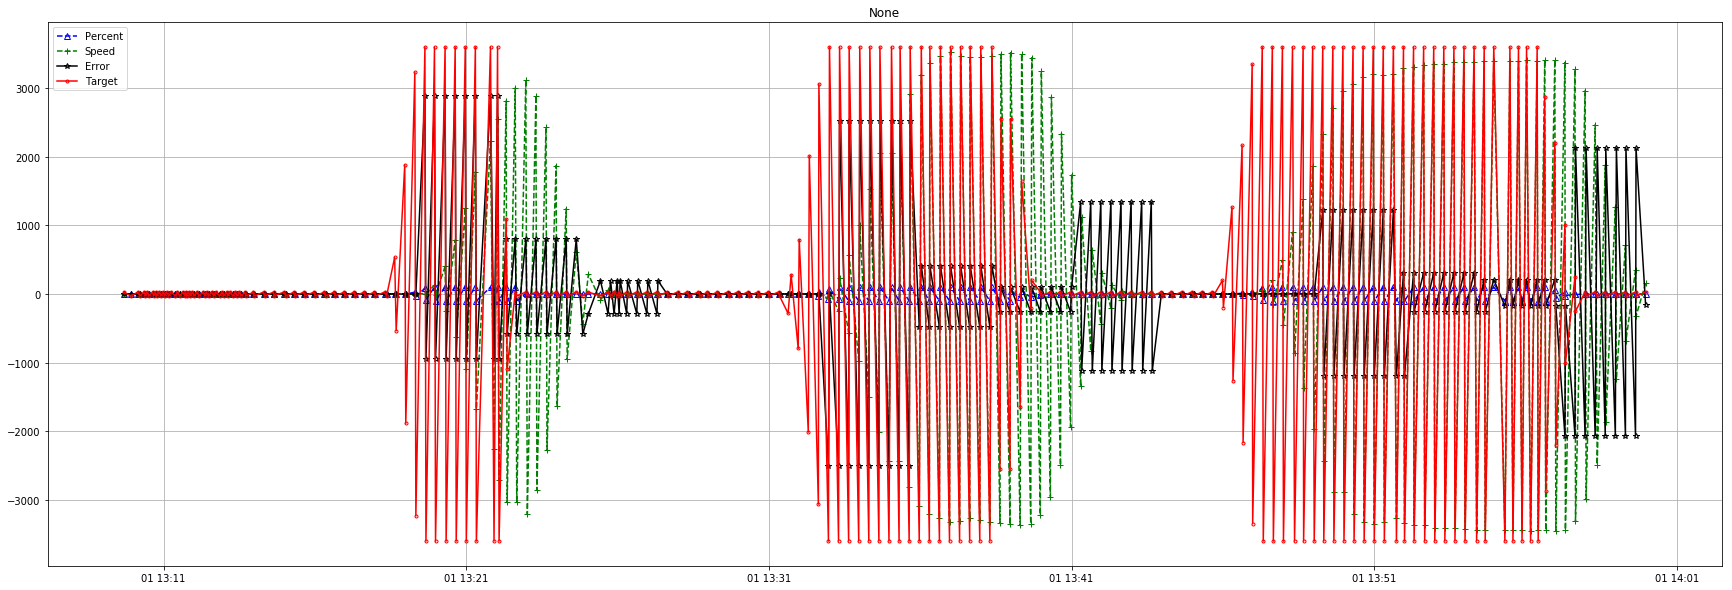

Month  1 Day  1 Hour 14


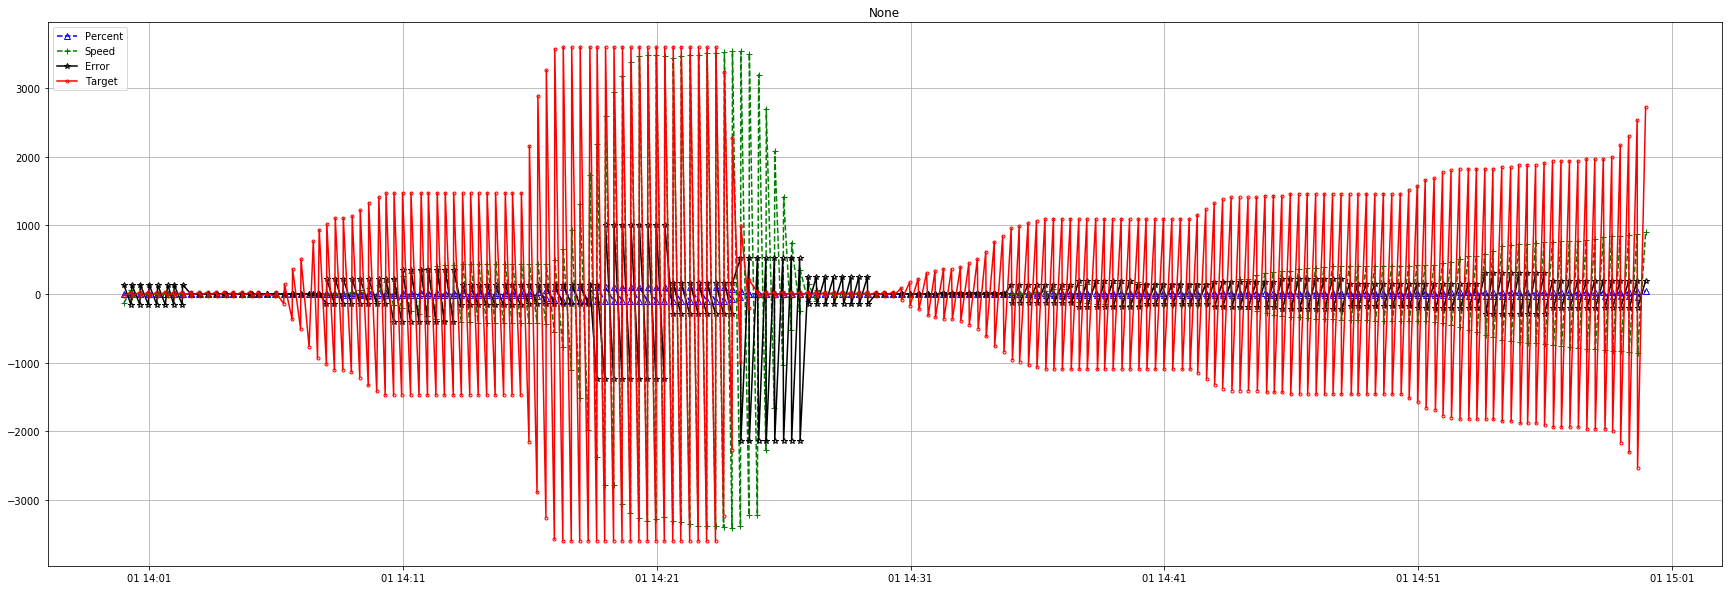

Month  1 Day  1 Hour 15


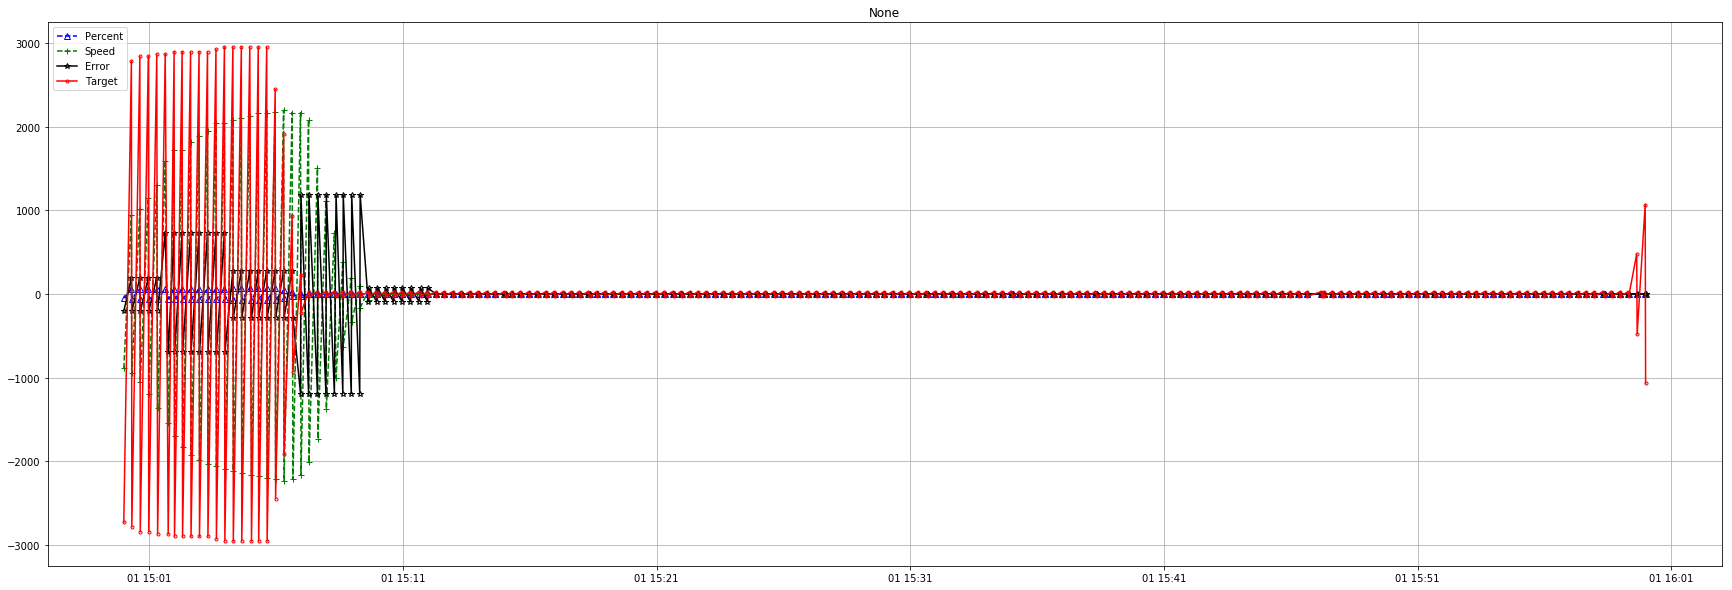

Month  1 Day  1 Hour 16


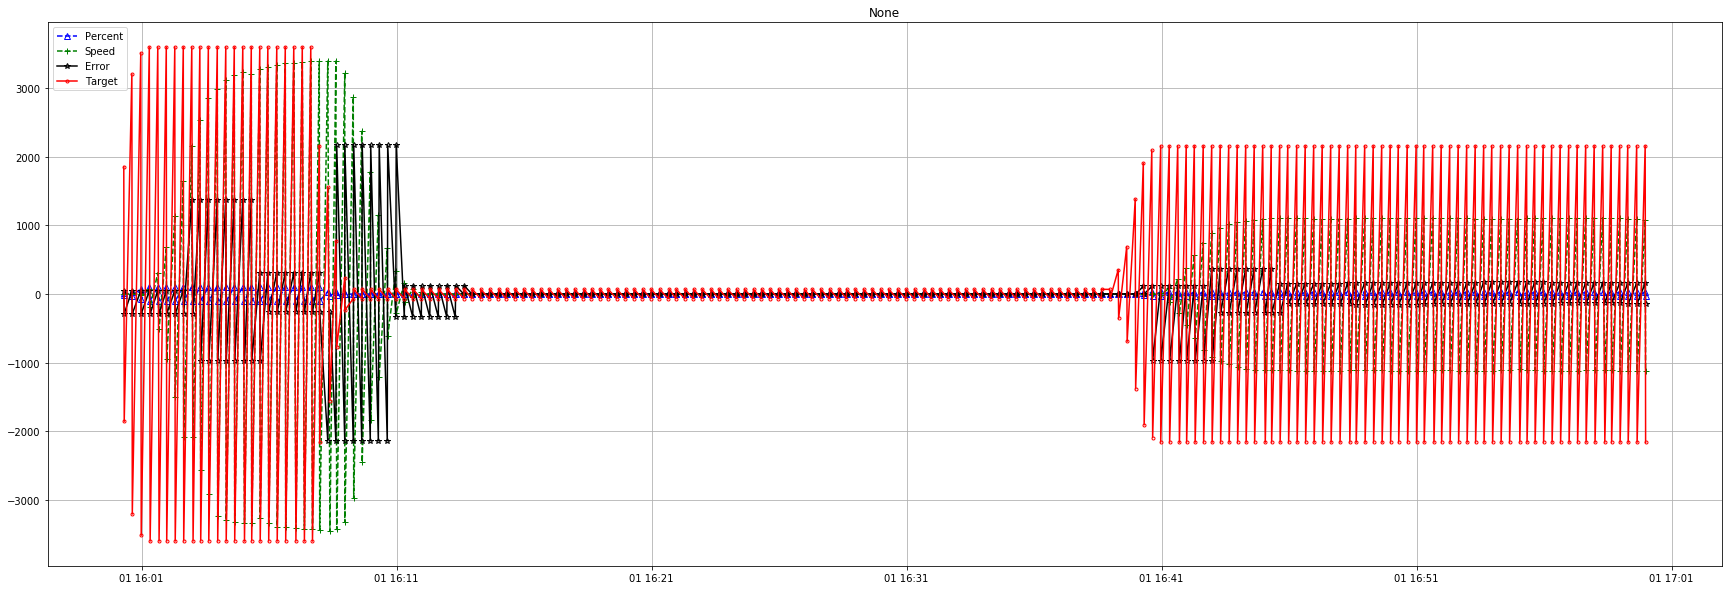

Month  1 Day  1 Hour 17


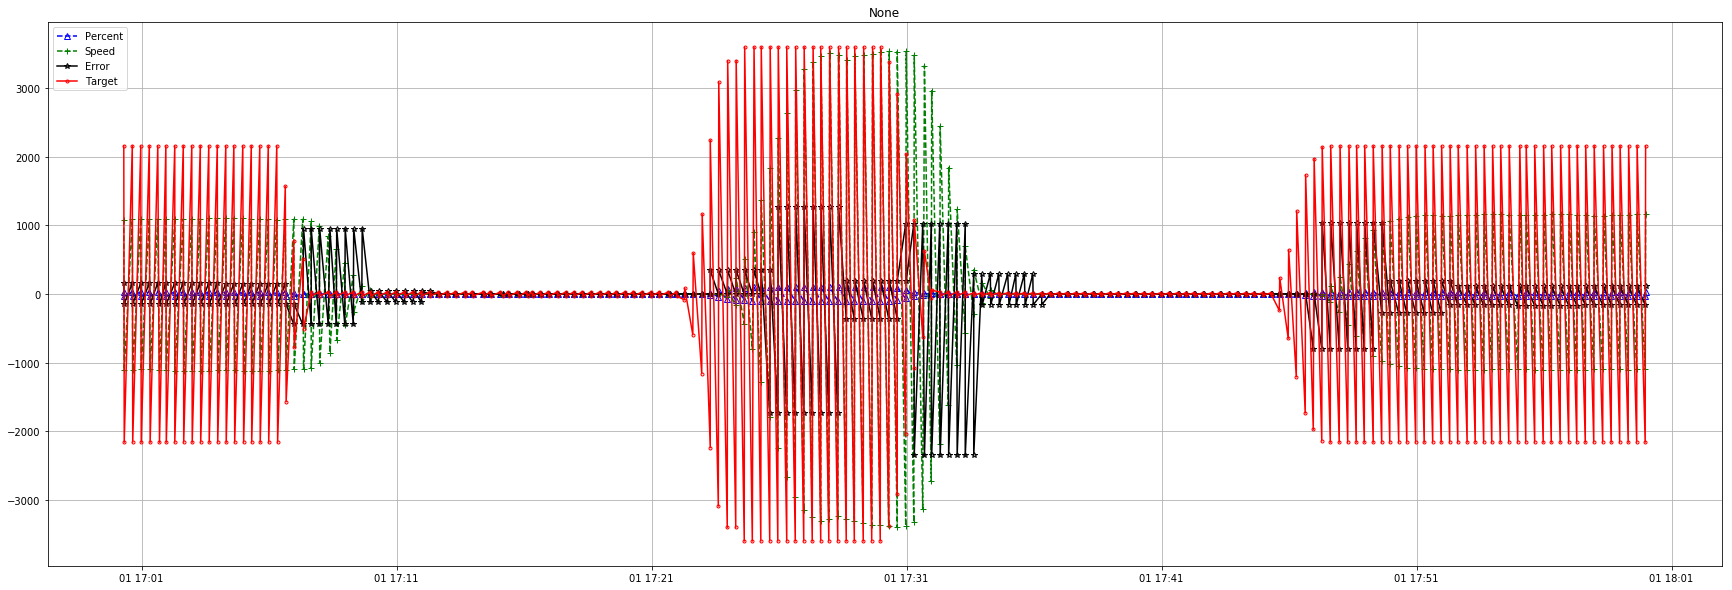

Month  1 Day  1 Hour 18


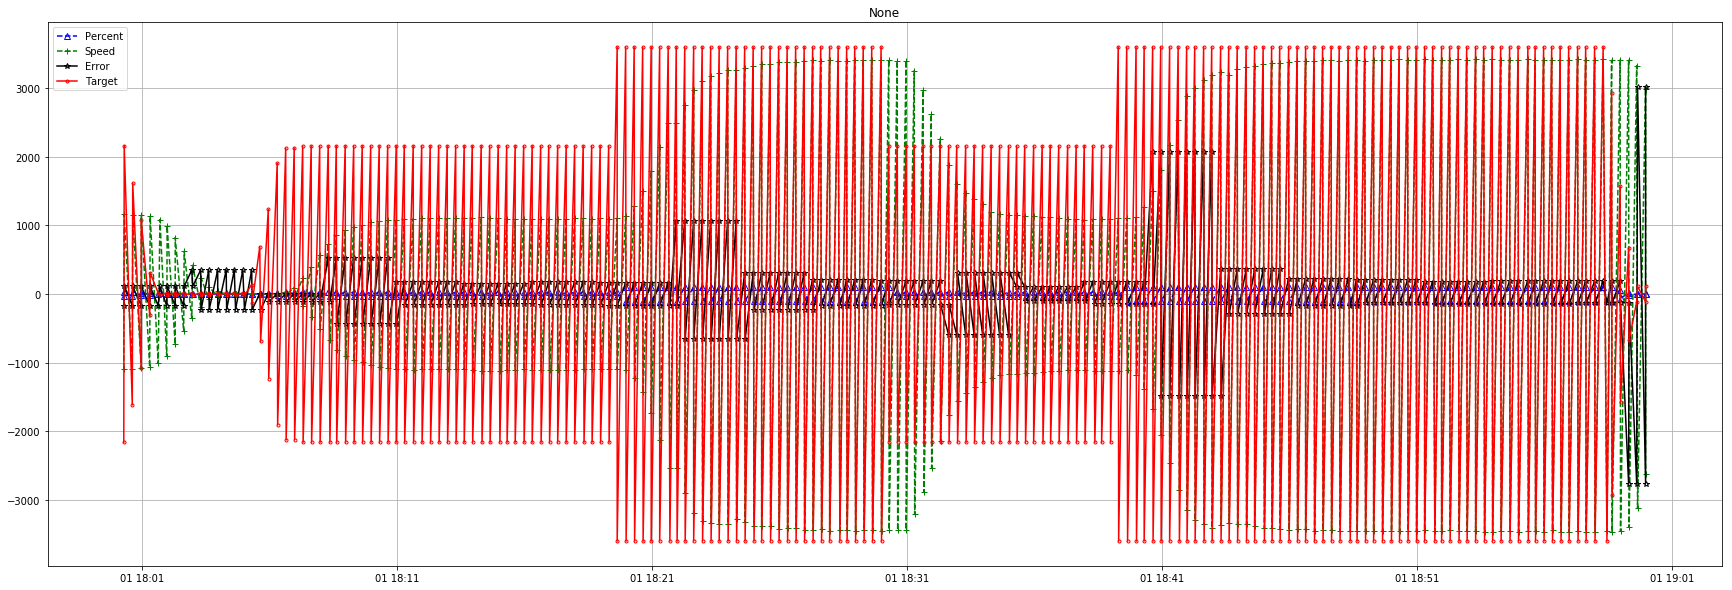

Month  1 Day  1 Hour 19


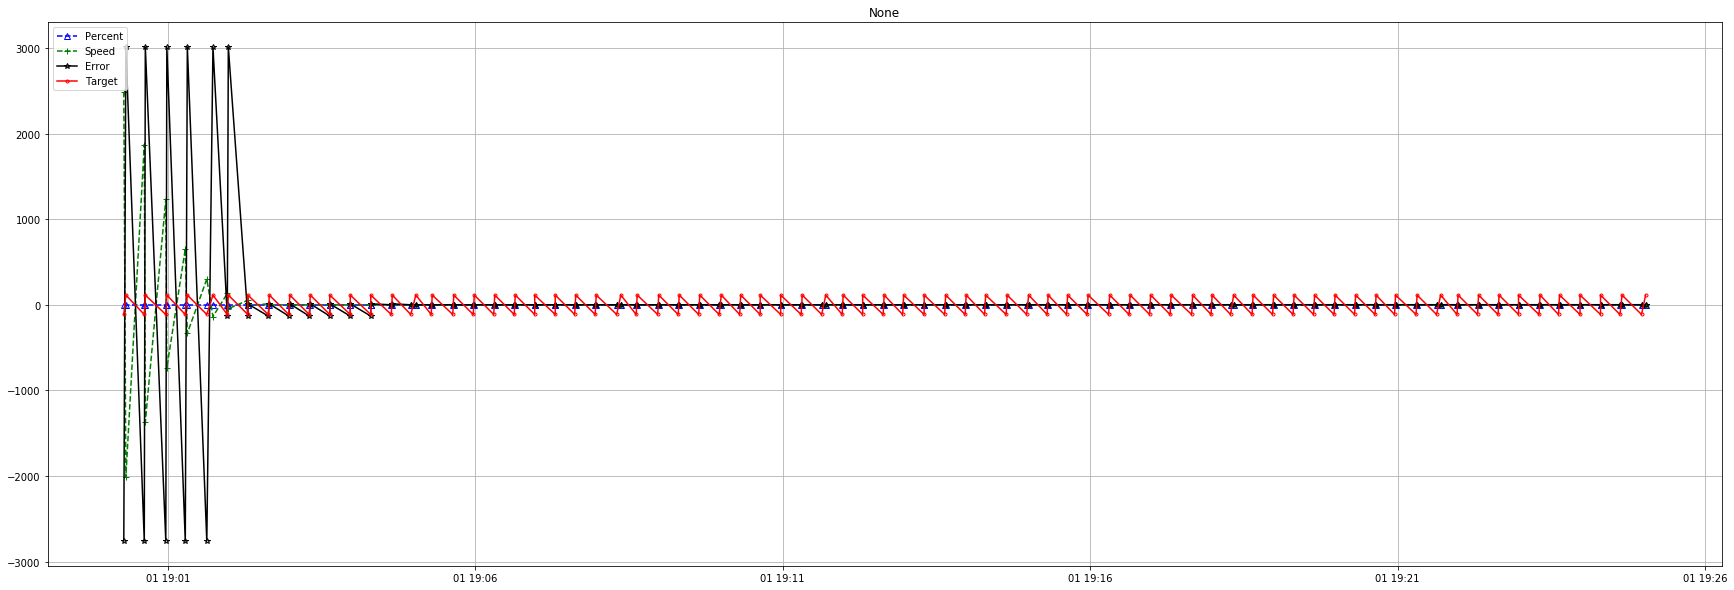

Month  1 Day  3 Hour 11


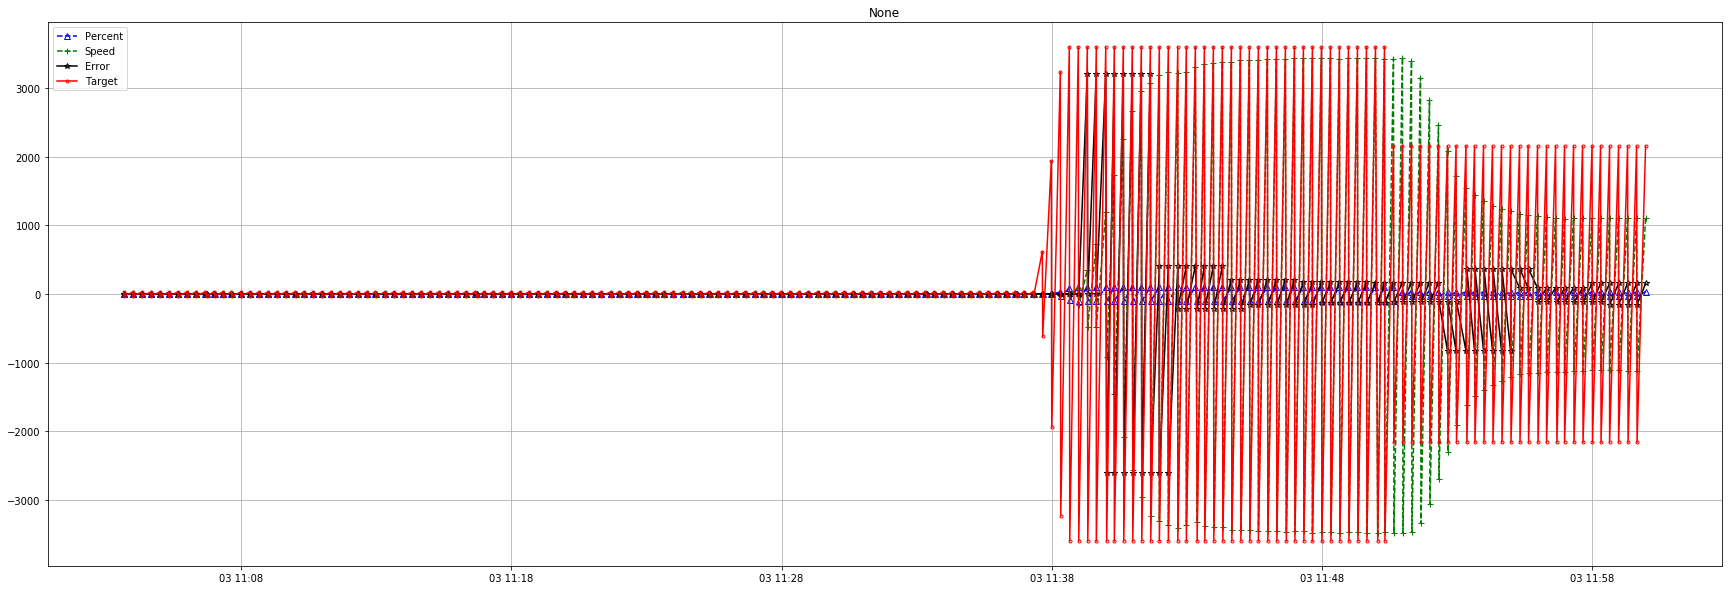

Month  1 Day  3 Hour 12


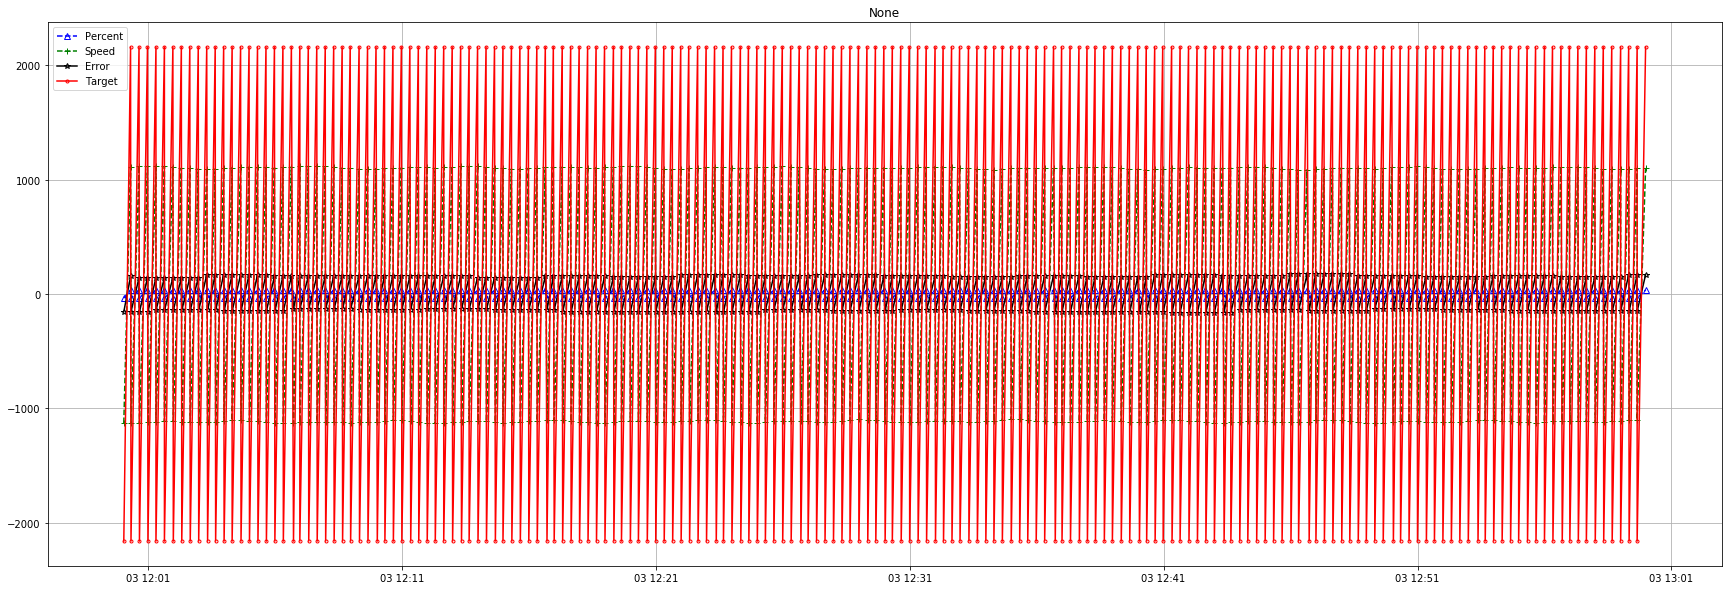

Month  1 Day  3 Hour 13


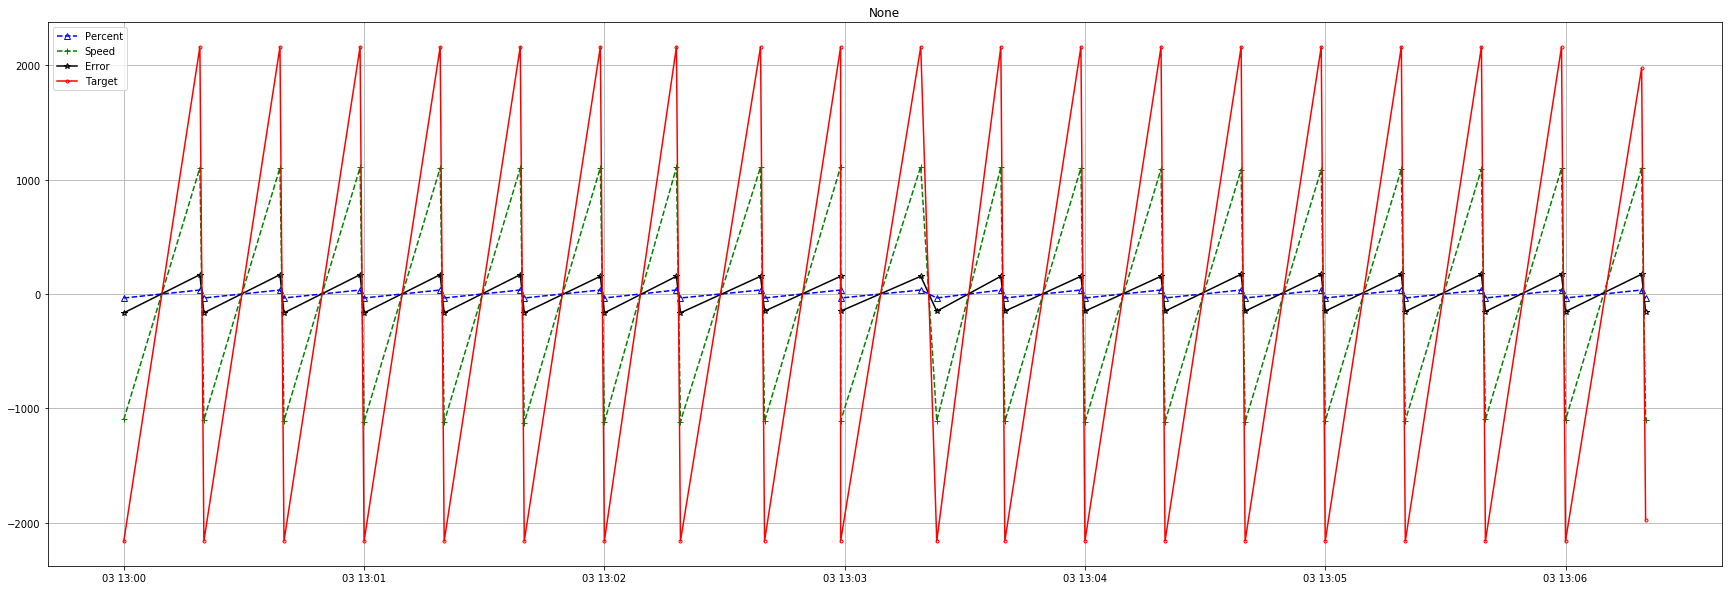

In [5]:
labels=dfHourList[0].columns
markers=[ "^", "+", '*', '.'] # optional : marker=(8,2,0)
colors=['b','g','k','r']
linestyles=['--','--','-','-']
for i in range(len(dfHourList)):
    fig=plt.figure(figsize=(30,10))
    ax=fig.add_subplot(111)
    for j in range(len(labels)):
        #print("Month ",dfHourList[i].index[0].month,"Day ",dfHourList[i].index[0].day,"Hour ",dfHourList[i].index[0].hour)
        ax.plot(dfHourList[i].index,dfHourList[i][labels[j]],c=colors[j],marker=markers[j],ls=linestyles[j],label=labels[j],fillstyle='none')
        plt.legend(loc="upper left")  
        plt.grid(True)
    title = print("Month ",dfHourList[i].index[0].month,"Day ",dfHourList[i].index[0].day,"Hour",dfHourList[i].index[0].hour)
    ax.set_title(title)
    plt.show()